In [2]:
pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

In [4]:
emotions = load_dataset('emotion')

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions['train']
test_ds = emotions['test']
val_ds = emotions['validation']

In [7]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [8]:
print(train_ds[0])

{'text': 'i didnt feel humiliated', 'label': 0}


In [9]:
print(train_ds['text'][0])

i didnt feel humiliated


#Visualization

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(train_ds)

In [12]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [13]:
def int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['labl_name'] = df['label'].apply(int2str)
df.head()

,text,label,labl_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


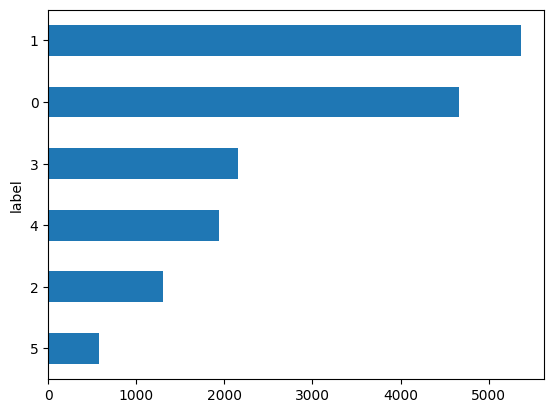

In [14]:
import matplotlib.pyplot as plt

df['label'].value_counts(ascending=True).plot.barh()
plt.show()

In [15]:
df['words per tweet'] = df['text'].str.split().apply(len)
df.head()

,text,label,labl_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


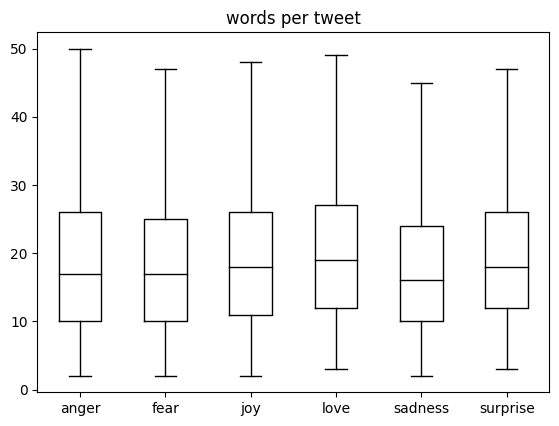

In [16]:
df.boxplot("words per tweet", by="labl_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

# From Text to Tokens

In [17]:
emotions.reset_format()

In [18]:
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

"""
also we can use:

from transformers import DistilBertTokenizer
model_ckpt = 'distilbert-base-uncased'
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

"""

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


"\nalso we can use:\n\nfrom transformers import DistilBertTokenizer\nmodel_ckpt = 'distilbert-base-uncased'\ndistilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)\n\n"

In [19]:
text = "who you are tokenizing?"

encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2040, 2017, 2024, 19204, 6026, 1029, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [20]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'who', 'you', 'are', 'token', '##izing', '?', '[SEP]']


In [21]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] who you are tokenizing? [SEP]


In [22]:
tokenizer.vocab_size

30522

In [23]:
tokenizer.model_max_length

512

In [24]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [25]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

In [26]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [27]:
  emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [28]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# Using Pretrained Model

In [29]:
from transformers import AutoModel
import torch

In [30]:
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if   torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

# Extracting the last hidden state

In [31]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
print(f"input  tensor shape {inputs['input_ids'].size()}")

# the resulting tensor has the shape  [batch_size,n_tokens]

input  tensor shape torch.Size([1, 6])


In [32]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [33]:
print(outputs.last_hidden_state.size())

torch.Size([1, 6, 768])


 hidden state tensor, we see that it has the shape
[batch_size,n_tokens, hidden_dim]
* In other words, a 768-dimensional vector is returned for each of the 6 input tokens
* For classification tasks, it is common
 practice to just use the hidden state associated with the
[CLS]
 token as the
 input feature

In [34]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [38]:
def extraction_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items()
  if k in tokenizer.model_input_names}
  # extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
    #retrun vector for [CLS] token
  return {'hidden_states': last_hidden_state[:,0].cpu().numpy()}

 Since our model expects tensors as inputs, the next thing to do is convert the
 input_ids
 and
attention_mask
 columns to the
"torch"
 format, as
 follows:

In [39]:
emotions_encoded.set_format('torch',
                            columns=['input_ids', 'attention_mask', 'label'])

In [40]:
emotions_hidden = emotions_encoded.map(extraction_hidden_states, batched=True)
#default batch_size=1000

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [41]:
 emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_states']

# Creating a feature matrix

In [45]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_states"])
X_valid = np.array(emotions_hidden["validation"]["hidden_states"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

#  Visualizing the training set

In [48]:
!pip install -q umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


In [52]:
import pandas as pd
import numpy as np
from umap.umap_ import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.208923,7.120716,0
1,-3.260702,6.329700,0
2,5.114085,3.620198,3
3,-2.519946,4.511364,2
4,-3.496758,4.501340,3


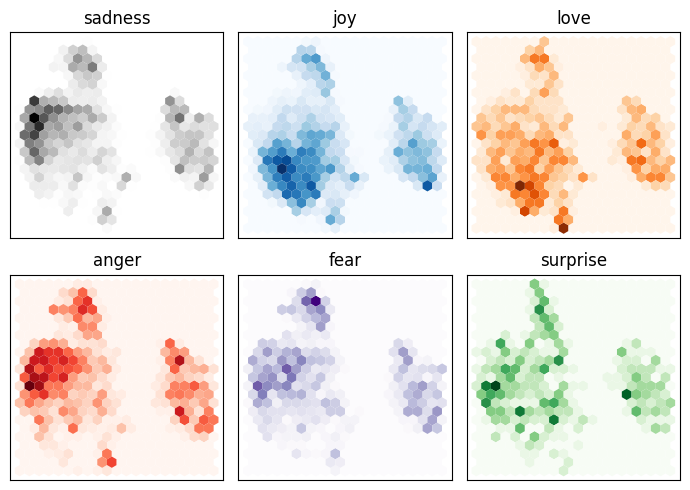

In [53]:
 fig, axes = plt.subplots(2, 3, figsize=(7,5))
 axes = axes.flatten()
 cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
 labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()


# Training a simple classifie

In [56]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.633

In [58]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

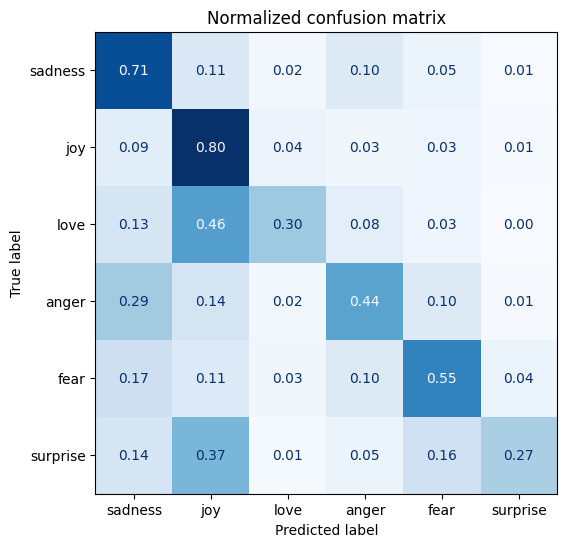

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)


# Fine-Tuning Transformers

## Loading a pretrained model

In [61]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##  Defining the performance metrics

In [62]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [63]:
from huggingface_hub import notebook_login
notebook_login()

In [64]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [67]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.802900,0.311347,0.910500,0.910078
2,0.244300,0.219924,0.925000,0.925046


In [68]:
preds_output = trainer.predict(emotions_encoded['validation'])
preds_output

In [69]:
preds_output.metrics

{'test_loss': 0.21992380917072296,
 'test_accuracy': 0.925,
 'test_f1': 0.9250456270367875,
 'test_runtime': 4.2198,
 'test_samples_per_second': 473.959,
 'test_steps_per_second': 7.583}

In [70]:
y_preds = np.argmax(preds_output.predictions, axis=1)

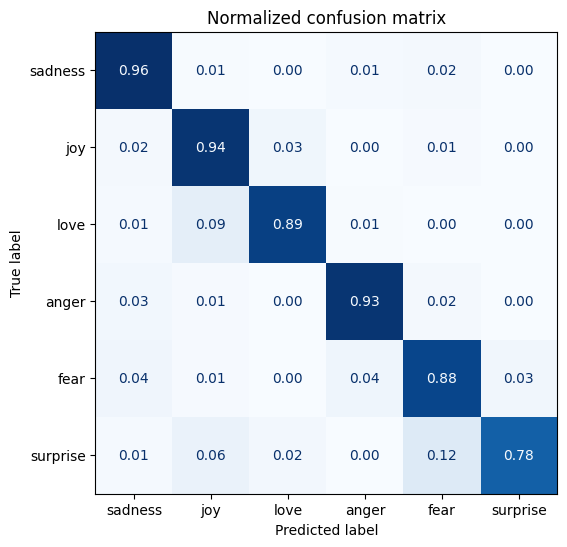

In [71]:
plot_confusion_matrix(y_preds, y_valid, labels)

  #  Error analysis

In [72]:
 #function that returns the loss
 along with the predicted label:
 from torch.nn.functional import cross_entropy

 def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [75]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
 # Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [77]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
.apply(int2str))

In [78]:
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.019722
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.022044
2,i feel like a faithful servant,love,love,0.458299
3,i am just feeling cranky and blue,anger,anger,0.034186
4,i can have for a treat or if i am feeling festive,joy,joy,0.022033


In [79]:
 df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.561134
1963,i called myself pro life and voted for perry w...,joy,sadness,5.356196
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.345128
1801,i feel that he was being overshadowed by the s...,love,sadness,5.203471
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.114732
1274,i am going to several holiday parties and i ca...,joy,sadness,4.919352
465,i would eventually go in to these stores but i...,joy,fear,4.897176
765,i feel super awkward and out of place right now,joy,sadness,4.847459
1509,i guess this is a memoir so it feels like that...,joy,fear,4.766843
1111,im lazy my characters fall into categories of ...,joy,fear,4.701718


In [80]:
 trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1729814573.c8e6b9942077.411.0:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/LeitoCan/distilbert-base-uncased-finetuned-emotion/commit/100070bd92b1c85a99f15c012ecd5c5db36960fb', commit_message='Training completed!', commit_description='', oid='100070bd92b1c85a99f15c012ecd5c5db36960fb', pr_url=None, pr_revision=None, pr_num=None)

# Using Our Model

In [81]:
from transformers import pipeline

In [82]:

model_id = "LeitoCan/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [83]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


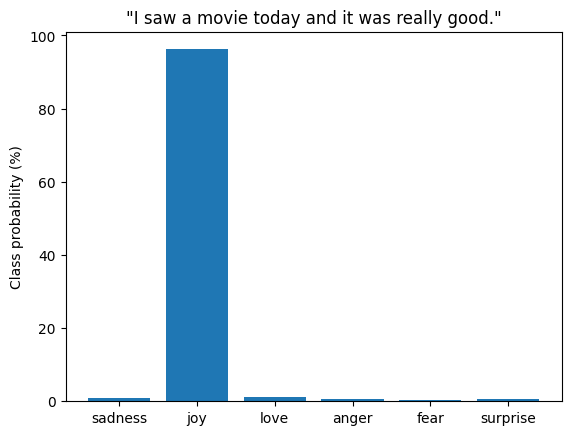

In [84]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()